In [270]:
samples = []

In [271]:
import csv
import cv2
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
%matplotlib inline


    
def load_samples(base_dir, augment):
    global samples
    
    base_img_dir = base_dir + '/IMG/'
    driving_log = base_dir+'/driving_log.csv'

    # Load and expand dataset
    with open(driving_log) as csvfile:
        reader = csv.reader(csvfile)
        next(reader) #skip first line
        for line in reader:
            img_center = base_img_dir+line[0].split("/")[-1]
            img_left = base_img_dir+line[1].split("/")[-1]
            img_right = base_img_dir+line[2].split("/")[-1]

            steering_center = float(line[3])

            # create adjusted steering measurements for the side camera images
            correction = 0.20 # this is a parameter to tune
            steering_left = steering_center + correction
            steering_right = steering_center - correction

            samples.append((img_center,steering_center,False)) # image_path, measurement, flip

            if augment:
                # if the steering angle exceeds a certain threshold use the views from the left and right
                # camera to train the model to accentuate the training signal.
                if abs(steering_center) > 0.33:
                    samples.append((img_left,steering_left,False))
                    samples.append((img_right,steering_right,False))
                
    
  

In [272]:
load_samples('data',False)

In [273]:
measurements = np.array(samples)[:,1].astype('float')

In [274]:
len(measurements)

8036

In [275]:
(min(measurements),max(measurements))

(-0.94269539999999996, 1.0)

In [284]:
bins = np.arange(-1.1,1.2,0.1,'float')

In [285]:
bins

array([ -1.10000000e+00,  -1.00000000e+00,  -9.00000000e-01,
        -8.00000000e-01,  -7.00000000e-01,  -6.00000000e-01,
        -5.00000000e-01,  -4.00000000e-01,  -3.00000000e-01,
        -2.00000000e-01,  -1.00000000e-01,   8.88178420e-16,
         1.00000000e-01,   2.00000000e-01,   3.00000000e-01,
         4.00000000e-01,   5.00000000e-01,   6.00000000e-01,
         7.00000000e-01,   8.00000000e-01,   9.00000000e-01,
         1.00000000e+00,   1.10000000e+00])

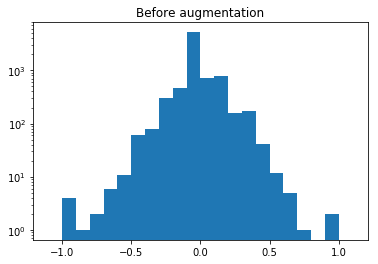

In [286]:
plt.hist(measurements,bins,range=(0,1200))
plt.yscale('log')
plt.title('Before augmentation')
plt.show()

In [287]:
samples = []
load_samples('data',True)

In [288]:
more_measurements = np.array(samples)[:,1].astype('float')

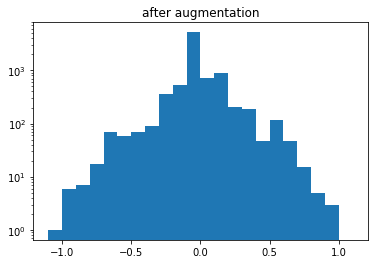

In [289]:
plt.hist(more_measurements,bins,range=(0,1200))
plt.yscale('log')
plt.title('after augmentation')
plt.show()

In [290]:
len(samples)

8626